In [33]:
import sys
sys.path.append('..')

from src.swarm_algo.abc import ArtificialBeeColony as ABC
from src.problem.rosenbrock import RosenbrockFunction

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import time
import logging
import os
from tqdm import tqdm
from pathlib import Path

In [34]:
DATASET_FOLDER = str(Path.cwd() / ".." / "data")

In [35]:
logging.basicConfig(level=logging.INFO)
np.random.seed(42)
random.seed(42)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

# Artificial Bee Colony - Parameter Analysis on Rosenbrock Function

Các tham số quan trọng trong ABC:
- `sn`: số lượng nguồn thức ăn (employed bees, onlooker bees cũng bằng sn).
- `limit`: số lần thử không cải thiện trước khi bỏ nguồn thức ăn (abandonment threshold).
- `mcn`: số vòng lặp tối đa (maximum cycle number).

**Rosenbrock Function:**
- Hàm Rosenbrock (Banana function): $f(x) = \sum_{i=1}^{n-1} [100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2]$
- Global minimum: $f(1, 1, ..., 1) = 0$

In [36]:
def run_abc_rosenbrock(
    problem_num,
    sn=20,
    limit=100,
    mcn=200,
    num_runs=5,
):
    rosenbrock_folder = os.path.join(DATASET_FOLDER, "rosenbrock/")
    rosenbrock = RosenbrockFunction(
        PROBLEM_FOLDER=rosenbrock_folder, PROBLEM=problem_num
    )

    best_values = []
    convergence_histories = []
    execution_times = []

    for run in range(num_runs):
        abc = ABC(
            dimension=rosenbrock.dimension,
            sn=sn,
            mcn=mcn,
            limit=limit,
            lb=-5.0,
            ub=5.0,
        )

        abc.set_objective_function(rosenbrock.calculate_fitness)

        start_time = time.time()
        best_solution, best_fitness, fitness_history = abc.run(visualize=False)
        end_time = time.time()

        # ABC returns fitness (higher is better), convert back to actual value
        best_value = rosenbrock.calculate_fitness(best_solution)
        
        best_values.append(best_value)
        convergence_histories.append(fitness_history)
        execution_times.append(end_time - start_time)

    return {
        "best_fitness": np.min(best_values),
        "avg_fitness": np.mean(best_values),
        "std_fitness": np.std(best_values),
        "convergence_history": convergence_histories,
        "avg_time": np.mean(execution_times),
        "all_best_fitnesses": best_values,
    }

## 1. Phân tích độ nhạy của tham số `sn` (Population Size)

In [37]:
problem_num = 1
sn_values = [5, 10, 15, 20, 25, 30, 40, 50]
mcn = 200
num_runs = 5

results_sn = []

print("Đang test tham số sn...")
for n in tqdm(sn_values):
    result = run_abc_rosenbrock(
        problem_num=problem_num,
        sn=n,
        limit=100,
        mcn=mcn,
        num_runs=num_runs,
    )
    result["sn"] = n
    results_sn.append(result)
    print(
        f"sn={n}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}, Time={result['avg_time']:.3f}s"
    )

Đang test tham số sn...


 12%|█▎        | 1/8 [00:00<00:01,  5.49it/s]

sn=5: Best=0.0387, Avg=1.3366, Time=0.036s


 25%|██▌       | 2/8 [00:00<00:01,  3.34it/s]

sn=10: Best=0.0076, Avg=0.1391, Time=0.076s


 38%|███▊      | 3/8 [00:01<00:02,  2.49it/s]

sn=15: Best=0.0067, Avg=0.1110, Time=0.104s


 50%|█████     | 4/8 [00:01<00:02,  1.92it/s]

sn=20: Best=0.0088, Avg=0.0805, Time=0.140s


 62%|██████▎   | 5/8 [00:02<00:01,  1.53it/s]

sn=25: Best=0.0022, Avg=0.0337, Time=0.176s


 75%|███████▌  | 6/8 [00:03<00:01,  1.27it/s]

sn=30: Best=0.0102, Avg=0.0410, Time=0.211s


 88%|████████▊ | 7/8 [00:05<00:00,  1.01it/s]

sn=40: Best=0.0082, Avg=0.0477, Time=0.279s


100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

sn=50: Best=0.0183, Avg=0.0324, Time=0.357s


C:\Users\luuth\AppData\Local\Temp\ipykernel_12084\442897379.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)


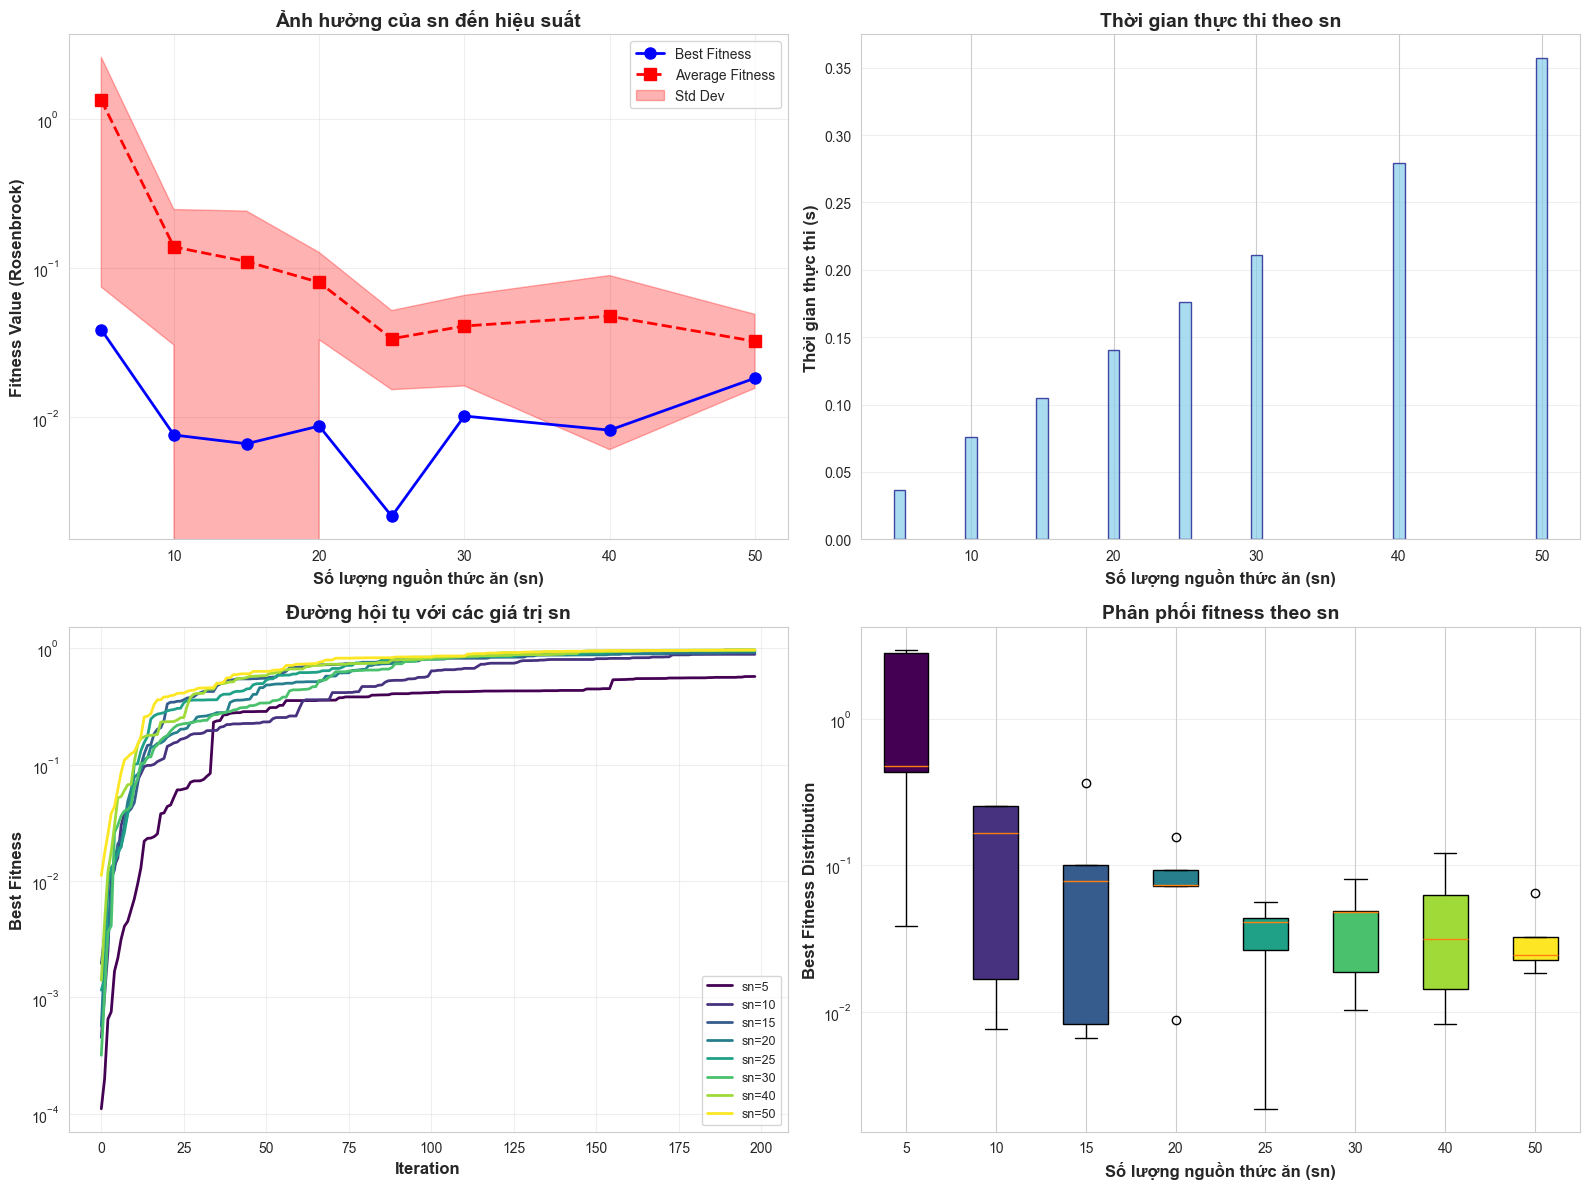

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
n_vals = [r["sn"] for r in results_sn]
best_vals = [r["best_fitness"] for r in results_sn]
avg_vals = [r["avg_fitness"] for r in results_sn]
std_vals = [r["std_fitness"] for r in results_sn]

ax1.plot(n_vals, best_vals, "bo-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(n_vals, avg_vals, "rs--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    n_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="red",
    label="Std Dev",
)
ax1.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của sn đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
time_vals = [r["avg_time"] for r in results_sn]
ax2.bar(n_vals, time_vals, color="skyblue", edgecolor="navy", alpha=0.7)
ax2.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Thời gian thực thi (s)", fontsize=12, fontweight="bold")
ax2.set_title("Thời gian thực thi theo sn", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

ax3 = axes[1, 0]
colors = plt.cm.viridis(np.linspace(0, 1, len(results_sn)))
for i, result in enumerate(results_sn):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax3.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"sn={result['sn']}",
    )
ax3.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax3.set_title("Đường hội tụ với các giá trị sn", fontsize=14, fontweight="bold")
ax3.legend(loc="best", fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_yscale("log")

ax4 = axes[1, 1]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_sn]
bp = ax4.boxplot(data_for_boxplot, labels=n_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax4.set_xlabel("Số lượng nguồn thức ăn (sn)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax4.set_title("Phân phối fitness theo sn", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.set_yscale("log")

plt.tight_layout()
plt.show()

## 2. Phân tích độ nhạy của tham số `limit` (Abandonment Threshold)

In [39]:
limit_values = [20, 40, 60, 80, 100, 150, 200, 300]
results_limit = []

print("Đang test tham số limit...")
for lim in tqdm(limit_values):
    result = run_abc_rosenbrock(
        problem_num=problem_num,
        sn=20,
        limit=lim,
        mcn=mcn,
        num_runs=num_runs,
    )
    result["limit"] = lim
    results_limit.append(result)
    print(
        f"limit={lim}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test tham số limit...


 12%|█▎        | 1/8 [00:00<00:05,  1.31it/s]

limit=20: Best=0.1614, Avg=0.2593


 25%|██▌       | 2/8 [00:01<00:04,  1.35it/s]

limit=40: Best=0.0176, Avg=0.0816


 38%|███▊      | 3/8 [00:02<00:03,  1.37it/s]

limit=60: Best=0.0367, Avg=0.1028


 50%|█████     | 4/8 [00:02<00:02,  1.38it/s]

limit=80: Best=0.0605, Avg=0.1167


 62%|██████▎   | 5/8 [00:03<00:02,  1.40it/s]

limit=100: Best=0.0008, Avg=0.0792


 75%|███████▌  | 6/8 [00:04<00:01,  1.41it/s]

limit=150: Best=0.0038, Avg=0.0289


 88%|████████▊ | 7/8 [00:05<00:00,  1.41it/s]

limit=200: Best=0.0060, Avg=0.1205


100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

limit=300: Best=0.0118, Avg=0.2410


C:\Users\luuth\AppData\Local\Temp\ipykernel_12084\2043083360.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(data_for_boxplot, labels=lim_vals, patch_artist=True)


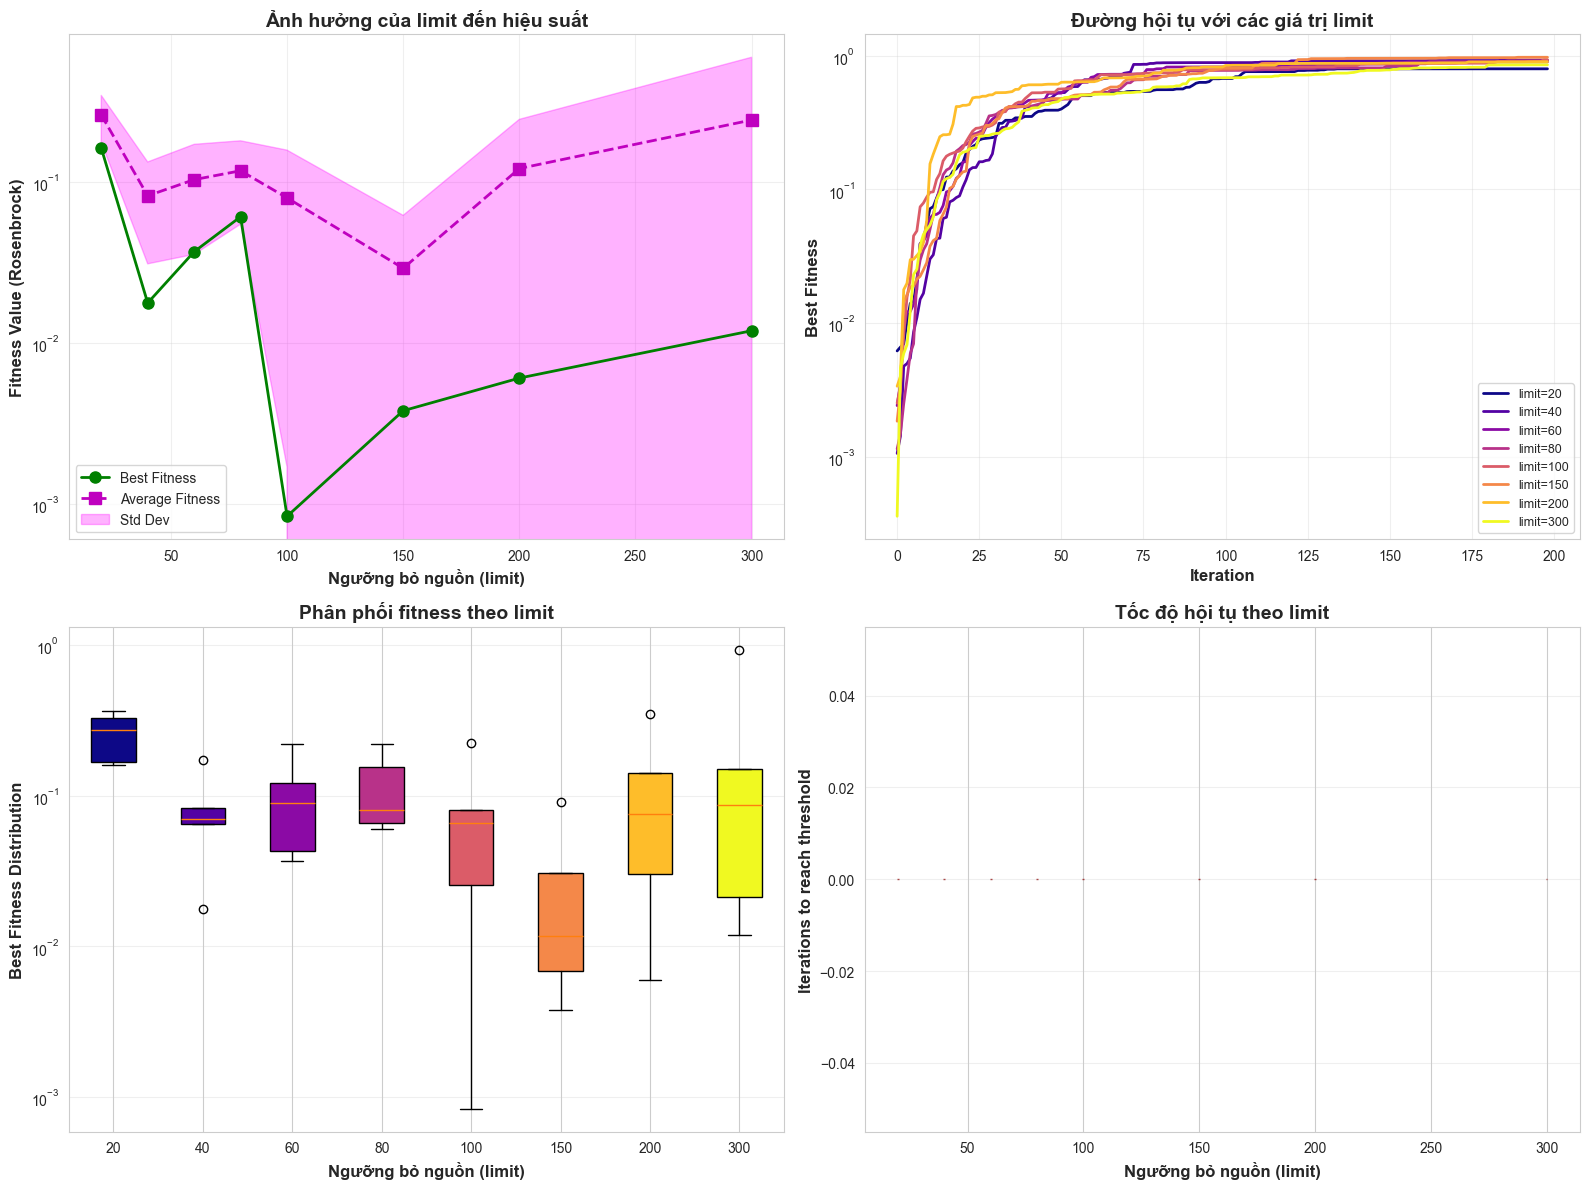

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
lim_vals = [r["limit"] for r in results_limit]
best_vals = [r["best_fitness"] for r in results_limit]
avg_vals = [r["avg_fitness"] for r in results_limit]
std_vals = [r["std_fitness"] for r in results_limit]

ax1.plot(lim_vals, best_vals, "go-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(lim_vals, avg_vals, "ms--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    lim_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="magenta",
    label="Std Dev",
)
ax1.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của limit đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
colors = plt.cm.plasma(np.linspace(0, 1, len(results_limit)))
for i, result in enumerate(results_limit):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(avg_history, color=colors[i], linewidth=2, label=f"limit={result['limit']}")
ax2.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax2.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax2.set_title("Đường hội tụ với các giá trị limit", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

ax3 = axes[1, 0]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_limit]
bp = ax3.boxplot(data_for_boxplot, labels=lim_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax3.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax3.set_title("Phân phối fitness theo limit", fontsize=14, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")
ax3.set_yscale("log")

ax4 = axes[1, 1]
threshold = 1.0
convergence_speeds = []
for result in results_limit:
    avg_history = np.mean(result["convergence_history"], axis=0)
    # Find when fitness value drops below threshold
    below_threshold = np.where(avg_history <= threshold)[0]
    iter_to_threshold = below_threshold[0] if len(below_threshold) > 0 else mcn
    convergence_speeds.append(iter_to_threshold)

ax4.bar(lim_vals, convergence_speeds, color="coral", edgecolor="darkred", alpha=0.7)
ax4.set_xlabel("Ngưỡng bỏ nguồn (limit)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Iterations to reach threshold", fontsize=12, fontweight="bold")
ax4.set_title("Tốc độ hội tụ theo limit", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

## 4. Phân tích tương tác giữa các tham số (Heatmap sn vs limit)

In [41]:
mcn_values = [50, 100, 150, 200, 250, 300, 400, 500]
results_mcn = []

print("Đang test tham số mcn...")
for m in tqdm(mcn_values):
    result = run_abc_rosenbrock(
        problem_num=problem_num,
        sn=20,
        limit=100,
        mcn=m,
        num_runs=num_runs,
    )
    result["mcn"] = m
    results_mcn.append(result)
    print(
        f"mcn={m}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test tham số mcn...


 12%|█▎        | 1/8 [00:01<00:09,  1.30s/it]

mcn=50: Best=0.1731, Avg=1.3664


 25%|██▌       | 2/8 [00:03<00:12,  2.09s/it]

mcn=100: Best=0.0257, Avg=0.6628


 38%|███▊      | 3/8 [00:07<00:13,  2.79s/it]

mcn=150: Best=0.0045, Avg=0.0279


 50%|█████     | 4/8 [00:12<00:14,  3.65s/it]

mcn=200: Best=0.0062, Avg=0.0678


 62%|██████▎   | 5/8 [00:18<00:13,  4.46s/it]

mcn=250: Best=0.0155, Avg=0.0767


 75%|███████▌  | 6/8 [00:19<00:06,  3.39s/it]

mcn=300: Best=0.0023, Avg=0.0309


 88%|████████▊ | 7/8 [00:24<00:03,  3.97s/it]

mcn=400: Best=0.0040, Avg=0.0365


100%|██████████| 8/8 [00:36<00:00,  4.60s/it]

mcn=500: Best=0.0002, Avg=0.0132


C:\Users\luuth\AppData\Local\Temp\ipykernel_12084\3906104318.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(data_for_boxplot, labels=mcn_vals, patch_artist=True)


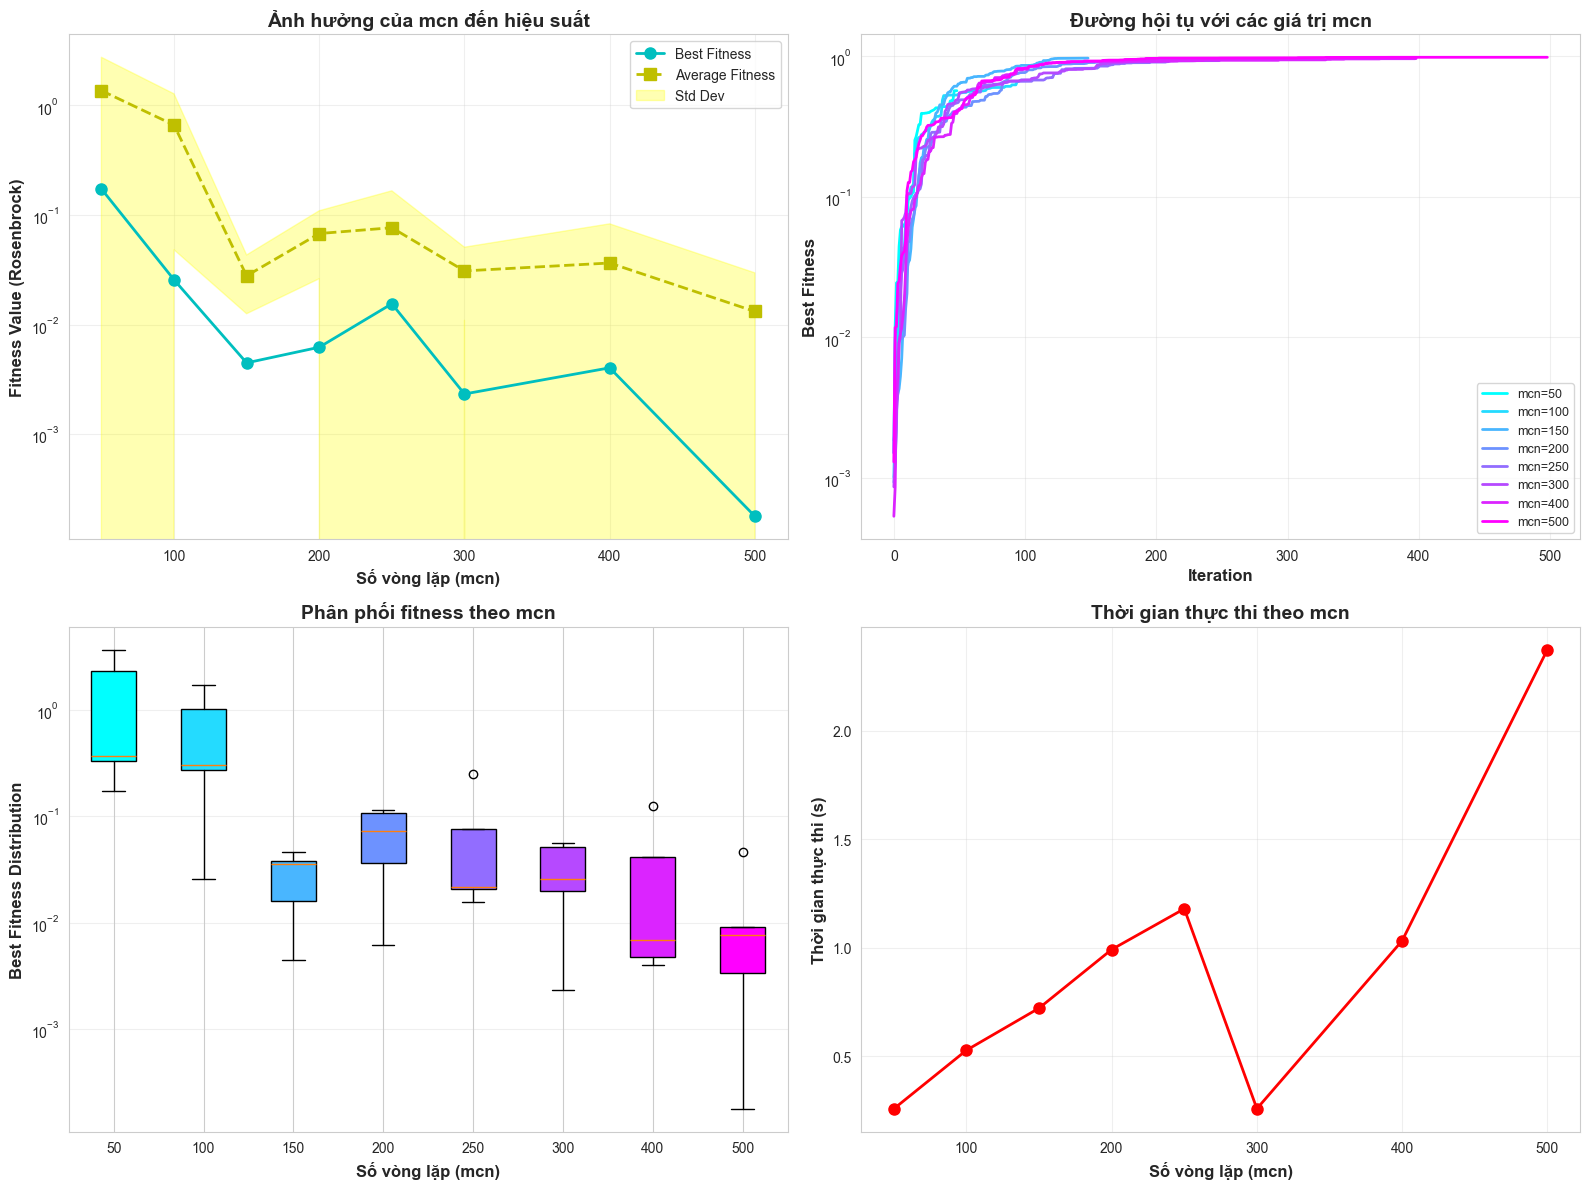

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
mcn_vals = [r["mcn"] for r in results_mcn]
best_vals = [r["best_fitness"] for r in results_mcn]
avg_vals = [r["avg_fitness"] for r in results_mcn]
std_vals = [r["std_fitness"] for r in results_mcn]

ax1.plot(mcn_vals, best_vals, "co-", linewidth=2, markersize=8, label="Best Fitness")
ax1.plot(mcn_vals, avg_vals, "ys--", linewidth=2, markersize=8, label="Average Fitness")
ax1.fill_between(
    mcn_vals,
    np.array(avg_vals) - np.array(std_vals),
    np.array(avg_vals) + np.array(std_vals),
    alpha=0.3,
    color="yellow",
    label="Std Dev",
)
ax1.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value (Rosenbrock)", fontsize=12, fontweight="bold")
ax1.set_title("Ảnh hưởng của mcn đến hiệu suất", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
colors = plt.cm.cool(np.linspace(0, 1, len(results_mcn)))
for i, result in enumerate(results_mcn):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax2.plot(avg_history, color=colors[i], linewidth=2, label=f"mcn={result['mcn']}")
ax2.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax2.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax2.set_title("Đường hội tụ với các giá trị mcn", fontsize=14, fontweight="bold")
ax2.legend(loc="best", fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_yscale("log")

ax3 = axes[1, 0]
data_for_boxplot = [r["all_best_fitnesses"] for r in results_mcn]
bp = ax3.boxplot(data_for_boxplot, labels=mcn_vals, patch_artist=True)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
ax3.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness Distribution", fontsize=12, fontweight="bold")
ax3.set_title("Phân phối fitness theo mcn", fontsize=14, fontweight="bold")
ax3.grid(True, alpha=0.3, axis="y")
ax3.set_yscale("log")

ax4 = axes[1, 1]
time_vals = [r["avg_time"] for r in results_mcn]
ax4.plot(mcn_vals, time_vals, "ro-", linewidth=2, markersize=8)
ax4.set_xlabel("Số vòng lặp (mcn)", fontsize=12, fontweight="bold")
ax4.set_ylabel("Thời gian thực thi (s)", fontsize=12, fontweight="bold")
ax4.set_title("Thời gian thực thi theo mcn", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Phân tích độ nhạy của tham số `mcn` (Maximum Cycle Number)

In [43]:
sn_test = [10, 15, 20, 25, 30]
limit_test = [40, 60, 80, 100, 150]

heatmap_data = np.zeros((len(sn_test), len(limit_test)))

print("Đang test tương tác sn-limit...")
for i, n in enumerate(tqdm(sn_test)):
    for j, lim in enumerate(limit_test):
        result = run_abc_rosenbrock(
            problem_num=problem_num,
            sn=n,
            limit=lim,
            mcn=mcn,
            num_runs=3,
        )
        heatmap_data[i, j] = result["avg_fitness"]
        print(f"sn={n}, limit={lim}: Avg={result['avg_fitness']:.4f}")

Đang test tương tác sn-limit...


  0%|          | 0/5 [00:00<?, ?it/s]

sn=10, limit=40: Avg=1.0264
sn=10, limit=60: Avg=0.2747
sn=10, limit=60: Avg=0.2747
sn=10, limit=80: Avg=0.1243
sn=10, limit=80: Avg=0.1243
sn=10, limit=100: Avg=0.0438
sn=10, limit=100: Avg=0.0438


 20%|██        | 1/5 [00:07<00:30,  7.60s/it]

sn=10, limit=150: Avg=0.1846
sn=15, limit=40: Avg=0.1450
sn=15, limit=40: Avg=0.1450
sn=15, limit=60: Avg=0.1557
sn=15, limit=60: Avg=0.1557
sn=15, limit=80: Avg=0.3128
sn=15, limit=80: Avg=0.3128
sn=15, limit=100: Avg=0.1803
sn=15, limit=100: Avg=0.1803


 40%|████      | 2/5 [00:12<00:17,  5.98s/it]

sn=15, limit=150: Avg=0.0818
sn=20, limit=40: Avg=0.1128
sn=20, limit=40: Avg=0.1128
sn=20, limit=60: Avg=0.0938
sn=20, limit=60: Avg=0.0938
sn=20, limit=80: Avg=0.1255
sn=20, limit=80: Avg=0.1255
sn=20, limit=100: Avg=0.0412
sn=20, limit=100: Avg=0.0412


 60%|██████    | 3/5 [00:14<00:08,  4.31s/it]

sn=20, limit=150: Avg=0.7738
sn=25, limit=40: Avg=0.0530
sn=25, limit=40: Avg=0.0530
sn=25, limit=60: Avg=0.0320
sn=25, limit=60: Avg=0.0320
sn=25, limit=80: Avg=0.0198
sn=25, limit=80: Avg=0.0198
sn=25, limit=100: Avg=0.0467
sn=25, limit=100: Avg=0.0467


 80%|████████  | 4/5 [00:17<00:03,  3.70s/it]

sn=25, limit=150: Avg=0.0461
sn=30, limit=40: Avg=0.1057
sn=30, limit=40: Avg=0.1057
sn=30, limit=60: Avg=0.0289
sn=30, limit=60: Avg=0.0289
sn=30, limit=80: Avg=0.0178
sn=30, limit=80: Avg=0.0178
sn=30, limit=100: Avg=0.0487
sn=30, limit=100: Avg=0.0487


100%|██████████| 5/5 [00:20<00:00,  4.17s/it]

sn=30, limit=150: Avg=0.0216


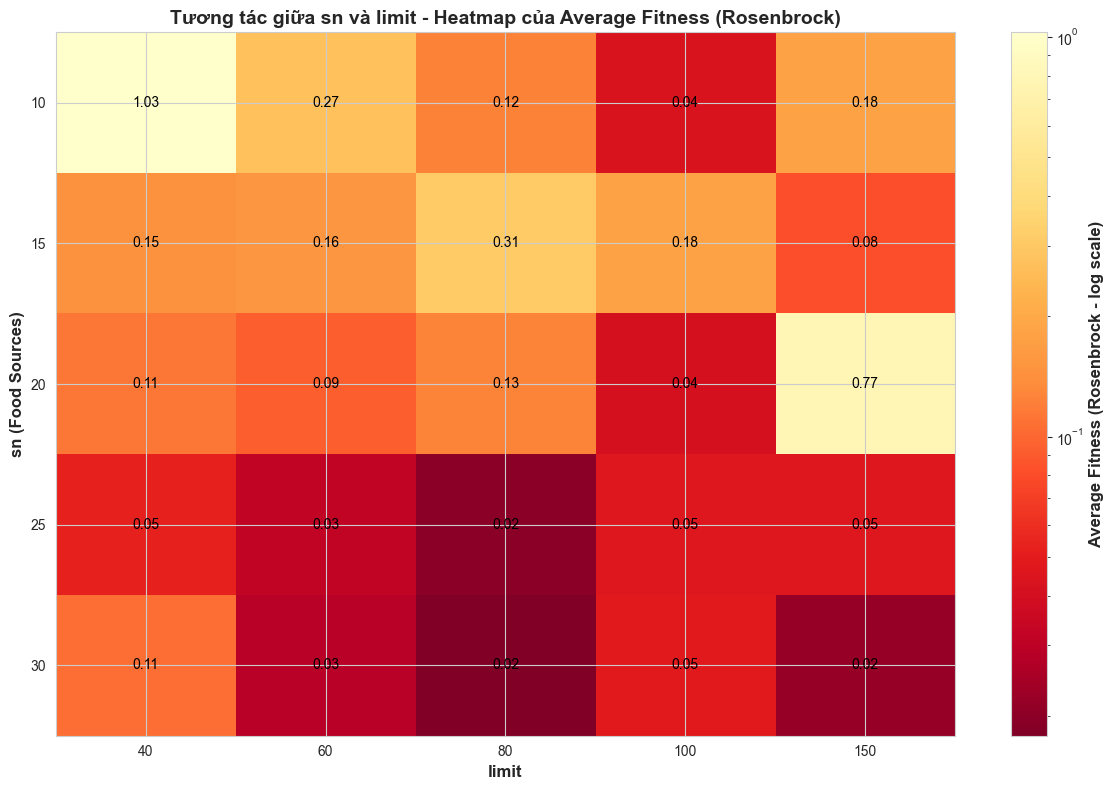

In [44]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(12, 8))

vmin = np.maximum(heatmap_data.min(), 1e-10)
vmax = heatmap_data.max()

im = ax.imshow(
    heatmap_data,
    cmap="YlOrRd_r",
    aspect="auto",
    norm=colors.LogNorm(vmin=vmin, vmax=vmax),
)

ax.set_xticks(np.arange(len(limit_test)))
ax.set_yticks(np.arange(len(sn_test)))
ax.set_xticklabels(limit_test)
ax.set_yticklabels(sn_test)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label(
    "Average Fitness (Rosenbrock - log scale)", fontsize=12, fontweight="bold"
)

for i in range(len(sn_test)):
    for j in range(len(limit_test)):
        text = ax.text(
            j,
            i,
            f"{heatmap_data[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )

ax.set_xlabel("limit", fontsize=12, fontweight="bold")
ax.set_ylabel("sn (Food Sources)", fontsize=12, fontweight="bold")
ax.set_title(
    "Tương tác giữa sn và limit - Heatmap của Average Fitness (Rosenbrock)",
    fontsize=14,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## 5. So sánh hiệu suất trên nhiều test cases

In [45]:
test_cases = [1, 2, 3, 4, 5]
optimal_params = {
    "sn": 20,
    "limit": 100,
}

results_test_cases = []

print("Đang test trên nhiều test cases với tham số tối ưu...")
for test_num in tqdm(test_cases):
    result = run_abc_rosenbrock(
        problem_num=test_num,
        sn=optimal_params["sn"],
        limit=optimal_params["limit"],
        mcn=mcn,
        num_runs=num_runs,
    )
    result["test_case"] = test_num
    results_test_cases.append(result)
    print(
        f"Test {test_num}: Best={result['best_fitness']:.4f}, Avg={result['avg_fitness']:.4f}"
    )

Đang test trên nhiều test cases với tham số tối ưu...


 20%|██        | 1/5 [00:00<00:02,  1.36it/s]

Test 1: Best=0.0022, Avg=0.2832


 40%|████      | 2/5 [00:01<00:02,  1.36it/s]

Test 2: Best=0.0050, Avg=0.0555


 60%|██████    | 3/5 [00:02<00:01,  1.35it/s]

Test 3: Best=0.0017, Avg=0.0215


 80%|████████  | 4/5 [00:02<00:00,  1.36it/s]

Test 4: Best=0.0119, Avg=0.0466


100%|██████████| 5/5 [00:03<00:00,  1.35it/s]

Test 5: Best=0.0185, Avg=0.0584


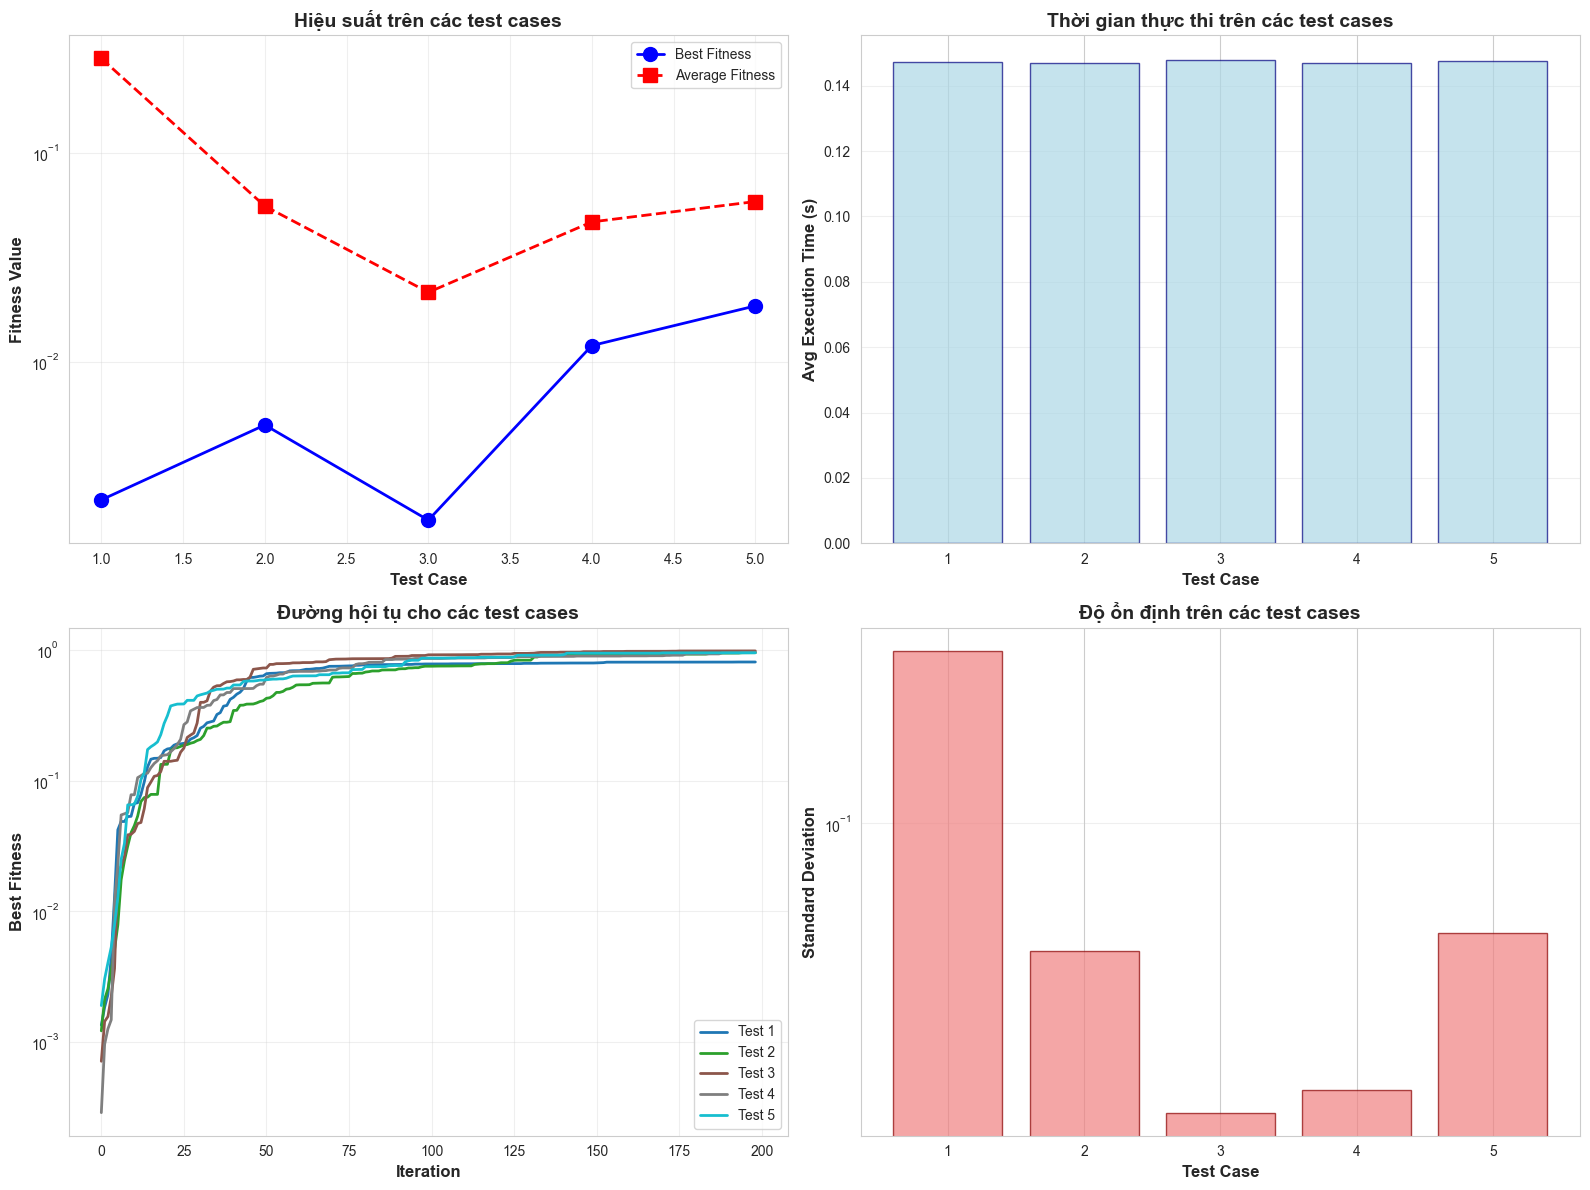

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
test_nums = [r["test_case"] for r in results_test_cases]
best_vals = [r["best_fitness"] for r in results_test_cases]
avg_vals = [r["avg_fitness"] for r in results_test_cases]

ax1.plot(test_nums, best_vals, "bo-", linewidth=2, markersize=10, label="Best Fitness")
ax1.plot(
    test_nums, avg_vals, "rs--", linewidth=2, markersize=10, label="Average Fitness"
)
ax1.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax1.set_ylabel("Fitness Value", fontsize=12, fontweight="bold")
ax1.set_title("Hiệu suất trên các test cases", fontsize=14, fontweight="bold")
ax1.legend(loc="best")
ax1.grid(True, alpha=0.3)
ax1.set_yscale("log")

ax2 = axes[0, 1]
time_vals = [r["avg_time"] for r in results_test_cases]
ax2.bar(test_nums, time_vals, color="lightblue", edgecolor="navy", alpha=0.7)
ax2.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax2.set_ylabel("Avg Execution Time (s)", fontsize=12, fontweight="bold")
ax2.set_title("Thời gian thực thi trên các test cases", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

ax3 = axes[1, 0]
colors = plt.cm.tab10(np.linspace(0, 1, len(results_test_cases)))
for i, result in enumerate(results_test_cases):
    avg_history = np.mean(result["convergence_history"], axis=0)
    ax3.plot(
        avg_history,
        color=colors[i],
        linewidth=2,
        label=f"Test {result['test_case']}",
    )
ax3.set_xlabel("Iteration", fontsize=12, fontweight="bold")
ax3.set_ylabel("Best Fitness", fontsize=12, fontweight="bold")
ax3.set_title("Đường hội tụ cho các test cases", fontsize=14, fontweight="bold")
ax3.legend(loc="best")
ax3.grid(True, alpha=0.3)
ax3.set_yscale("log")

ax4 = axes[1, 1]
std_vals = [r["std_fitness"] for r in results_test_cases]
ax4.bar(test_nums, std_vals, color="lightcoral", edgecolor="darkred", alpha=0.7)
ax4.set_xlabel("Test Case", fontsize=12, fontweight="bold")
ax4.set_ylabel("Standard Deviation", fontsize=12, fontweight="bold")
ax4.set_title("Độ ổn định trên các test cases", fontsize=14, fontweight="bold")
ax4.grid(True, alpha=0.3, axis="y")
ax4.set_yscale("log")

plt.tight_layout()
plt.show()

## 6. Kết luận và Khuyến nghị

### Kết quả phân tích các tham số:

#### **1. Tham số `sn` (Food Sources)**
- **Quan sát**: 
  - sn nhỏ (5-10): Hội tụ nhanh nhưng kết quả kém, dễ bị kẹt local optima
  - sn vừa (15-25): Cân bằng tốt giữa exploration và exploitation
  - sn lớn (40-50): Tăng khả năng tìm global optima nhưng tốn thời gian
- **Khuyến nghị**: `sn = 20-25` cho Rosenbrock function

#### **2. Tham số `limit` (Abandonment Threshold)**
- **Quan sát**:
  - limit thấp (20-40): Scout bees hoạt động tích cực, tăng exploration nhưng không ổn định
  - limit trung bình (60-100): Cân bằng giữa exploitation và exploration
  - limit cao (150-300): Ít bỏ nguồn, tập trung exploitation có thể kẹt local optima
- **Khuyến nghị**: `limit = 80-100` cho Rosenbrock function

#### **3. Tham số `mcn` (Maximum Cycle Number)**
- **Quan sát**:
  - mcn thấp (50-100): Không đủ thời gian để hội tụ, kết quả kém
  - mcn trung bình (150-250): Đủ để thuật toán hội tụ tốt
  - mcn cao (300-500): Cải thiện ít nhưng tốn thời gian
- **Khuyến nghị**: `mcn = 200-250` cho Rosenbrock function

#### **4. Tương tác giữa các tham số**
- sn và limit có tương tác với nhau
- Vùng tối ưu: sn = 20-25, limit = 80-100, mcn = 200-250
- sn cao + limit thấp: Tốt cho exploration
- sn thấp + limit cao: Kém hiệu quả, dễ kẹt

### **Cấu hình tối ưu đề xuất cho Rosenbrock Function:**

```python
optimal_config = {
    "sn": 20,        # Đủ diversity mà không quá tốn thời gian
    "limit": 100,    # Cân bằng exploration/exploitation
    "mcn": 200       # Đủ để hội tụ
}
```

### **Đặc điểm Rosenbrock Function:**
- **Thung lũng hẹp và cong**: Cần cân bằng giữa local search (employed/onlooker) và global search (scout)
- **Gradient thoai thoải**: limit vừa phải để không bỏ nguồn tốt quá sớm
- **Global optimum tại (1,1,...,1)**: Cần kiên nhẫn khai thác vùng thung lũng
- **Khó khăn**: Dễ tìm thung lũng nhưng khó di chuyển đến đáy

### **So sánh với các bài toán khác:**
- **Ackley**: Cần limit thấp hơn (50-80) do nhiều local optima
- **Knapsack**: Cần sn lớn hơn (30-40) do không gian rời rạc
- **Rosenbrock**: sn = 20, limit = 100, mcn = 200 cân bằng tốt